In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

In [89]:
def rmse(y_pred, y_true):
    MSE = mean_squared_error(y_true, y_pred)
    return math.sqrt(MSE)

def plot_series(df):
    plt.style.use("seaborn-whitegrid")
    plt.rc(
        "figure",
        autolayout=True,
        figsize=(11, 4),
        titlesize=18,
        titleweight='bold',
    )
    plt.rc(
        "axes",
        labelweight="bold",
        labelsize="large",
        titleweight="bold",
        titlesize=16,
        titlepad=10,
    )
    %config InlineBackend.figure_format = 'retina'

    fig, ax = plt.subplots()
    ax.plot(df.index, 'Débit horaire', data=df, color='0.75')
    ax = sns.regplot(x=df.index, y='Débit horaire', data=df, ci=None, scatter_kws=dict(color='0.25'))
    ax.set_title('Time Plot of Hardcover Sales')

In [90]:
df = pd.read_csv("/Users/cha/Desktop/Code/eCSpress/data/baseline_with_vacations.csv")
df['Date et heure de comptage'] = pd.to_datetime(df['Date et heure de comptage'], format='%Y-%m-%d %H:%M:%S')
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
print("len whole_df", len(df))
print(df.dtypes)
df.head()

len whole_df 27548
Libelle                              object
Date et heure de comptage    datetime64[ns]
Débit horaire                       float64
Taux d'occupation                   float64
Etat trafic                           int64
Etat arc_Barré                        int64
Etat arc_Invalide                     int64
Date                         datetime64[ns]
Jour férié                            int64
Jour de la semaine_0                  int64
Jour de la semaine_1                  int64
Jour de la semaine_2                  int64
Jour de la semaine_3                  int64
Jour de la semaine_4                  int64
Jour de la semaine_5                  int64
Jour de la semaine_6                  int64
dtype: object


,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc_Barré,Etat arc_Invalide,Date,Jour férié,Jour de la semaine_0,Jour de la semaine_1,Jour de la semaine_2,Jour de la semaine_3,Jour de la semaine_4,Jour de la semaine_5,Jour de la semaine_6
0,AV_Champs_Elysees,2022-01-01 11:00:00,524.0,8.85667,1,0,1,2022-01-01,1,0,0,0,0,0,1,0
1,AV_Champs_Elysees,2022-01-01 07:00:00,491.0,7.71611,1,0,1,2022-01-01,1,0,0,0,0,0,1,0
2,AV_Champs_Elysees,2022-01-01 19:00:00,997.0,46.28889,3,0,1,2022-01-01,1,0,0,0,0,0,1,0
3,AV_Champs_Elysees,2022-01-01 18:00:00,1096.0,46.60222,3,0,1,2022-01-01,1,0,0,0,0,0,1,0
4,AV_Champs_Elysees,2022-01-01 09:00:00,258.0,3.75445,1,0,1,2022-01-01,1,0,0,0,0,0,1,0


# LINEAR REGRESSION

In [91]:
libelle = "AV_Champs_Elysees"

ce_df = df[df["Libelle"]==libelle]
print("nb instances", len(ce_df))
ce_df = ce_df.sort_values(by='Date et heure de comptage')
ce_df = ce_df.reset_index(drop=True)
ce_df

nb instances 9186


,Libelle,Date et heure de comptage,Débit horaire,Taux d'occupation,Etat trafic,Etat arc_Barré,Etat arc_Invalide,Date,Jour férié,Jour de la semaine_0,Jour de la semaine_1,Jour de la semaine_2,Jour de la semaine_3,Jour de la semaine_4,Jour de la semaine_5,Jour de la semaine_6
0,AV_Champs_Elysees,2021-11-01 04:00:00,1222.0,42.87945,3,0,1,2021-11-01,1,1,0,0,0,0,0,0
1,AV_Champs_Elysees,2021-11-01 05:00:00,1033.0,44.35278,3,0,1,2021-11-01,1,1,0,0,0,0,0,0
2,AV_Champs_Elysees,2021-11-01 06:00:00,824.0,20.16222,2,0,1,2021-11-01,1,1,0,0,0,0,0,0
3,AV_Champs_Elysees,2021-11-01 07:00:00,710.0,12.20000,1,0,1,2021-11-01,1,1,0,0,0,0,0,0
4,AV_Champs_Elysees,2021-11-01 08:00:00,947.0,40.57222,3,0,1,2021-11-01,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9181,AV_Champs_Elysees,2022-12-03 20:00:00,1178.0,35.10778,3,0,1,2022-12-03,0,0,0,0,0,0,1,0
9182,AV_Champs_Elysees,2022-12-03 21:00:00,1107.0,46.05833,3,0,1,2022-12-03,0,0,0,0,0,0,1,0
9183,AV_Champs_Elysees,2022-12-03 22:00:00,1256.0,33.02056,3,0,1,2022-12-03,0,0,0,0,0,0,1,0
9184,AV_Champs_Elysees,2022-12-03 23:00:00,1189.0,31.78667,3,0,1,2022-12-03,0,0,0,0,0,0,1,0


/var/folders/bh/bfb7wn_x3_zfg8l403qdhw900000gn/T/ipykernel_2883/4121167745.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


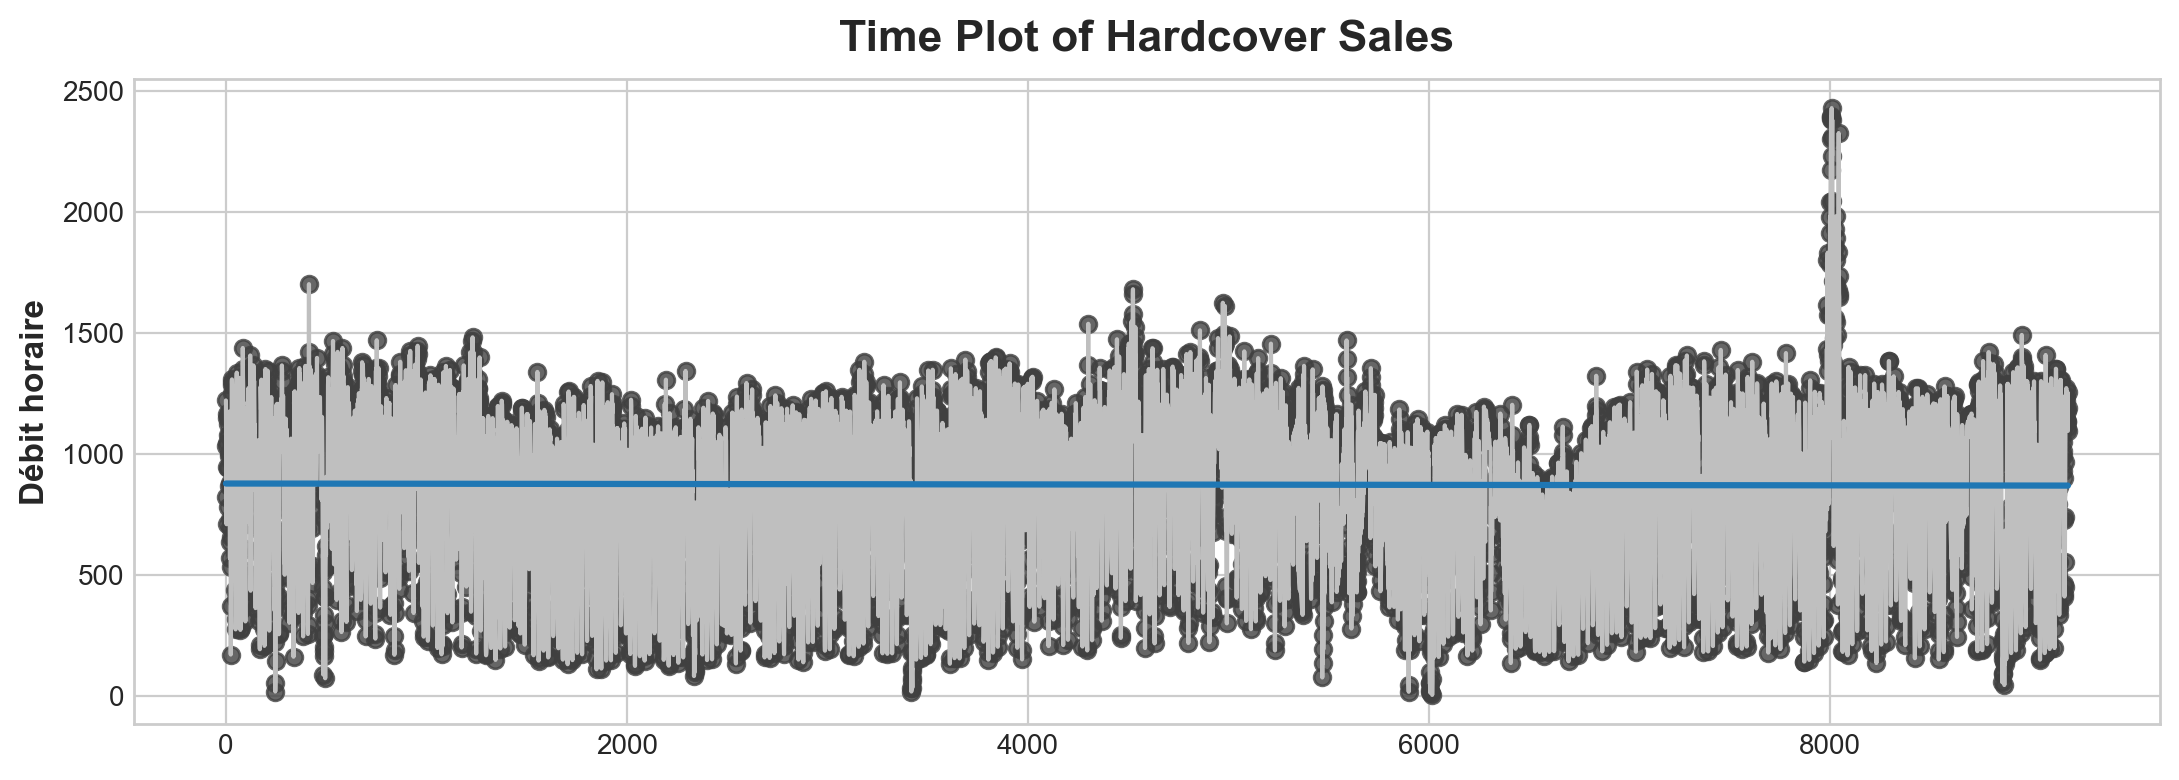

In [92]:
plot_series(ce_df)

In [135]:
def linear_regr(df: pd.DataFrame, x_feature_names: list, y_feature_name: str):
    # Training data
    X = df.loc[:, x_feature_names]  # features
    y = df.loc[:, y_feature_name]  # target

    # Dropping NaN values
    X.dropna(inplace=True)  # drop missing values in the feature set
    y, X = y.align(X, join='inner')  # drop corresponding values in target

    # Train the model
    model = LinearRegression()
    model.fit(X, y)

    # Store the fitted values as a time series with the same time index as
    # the training data
    y_pred = pd.Series(model.predict(X), index=X.index)

    print("RMSE", round(rmse(y_pred, y), 1))

    plot_params = dict(
        color="0.75",
        style=".-",
        markeredgecolor="0.25",
        markerfacecolor="0.25",
        legend=False,
    )

    ax = y.plot(**plot_params)
    ax = y_pred.plot(ax=ax, linewidth=3)
    ax.set_title('Plot')

## Débit horaire

283.741802334309


Text(0.5, 1.0, 'Plot')

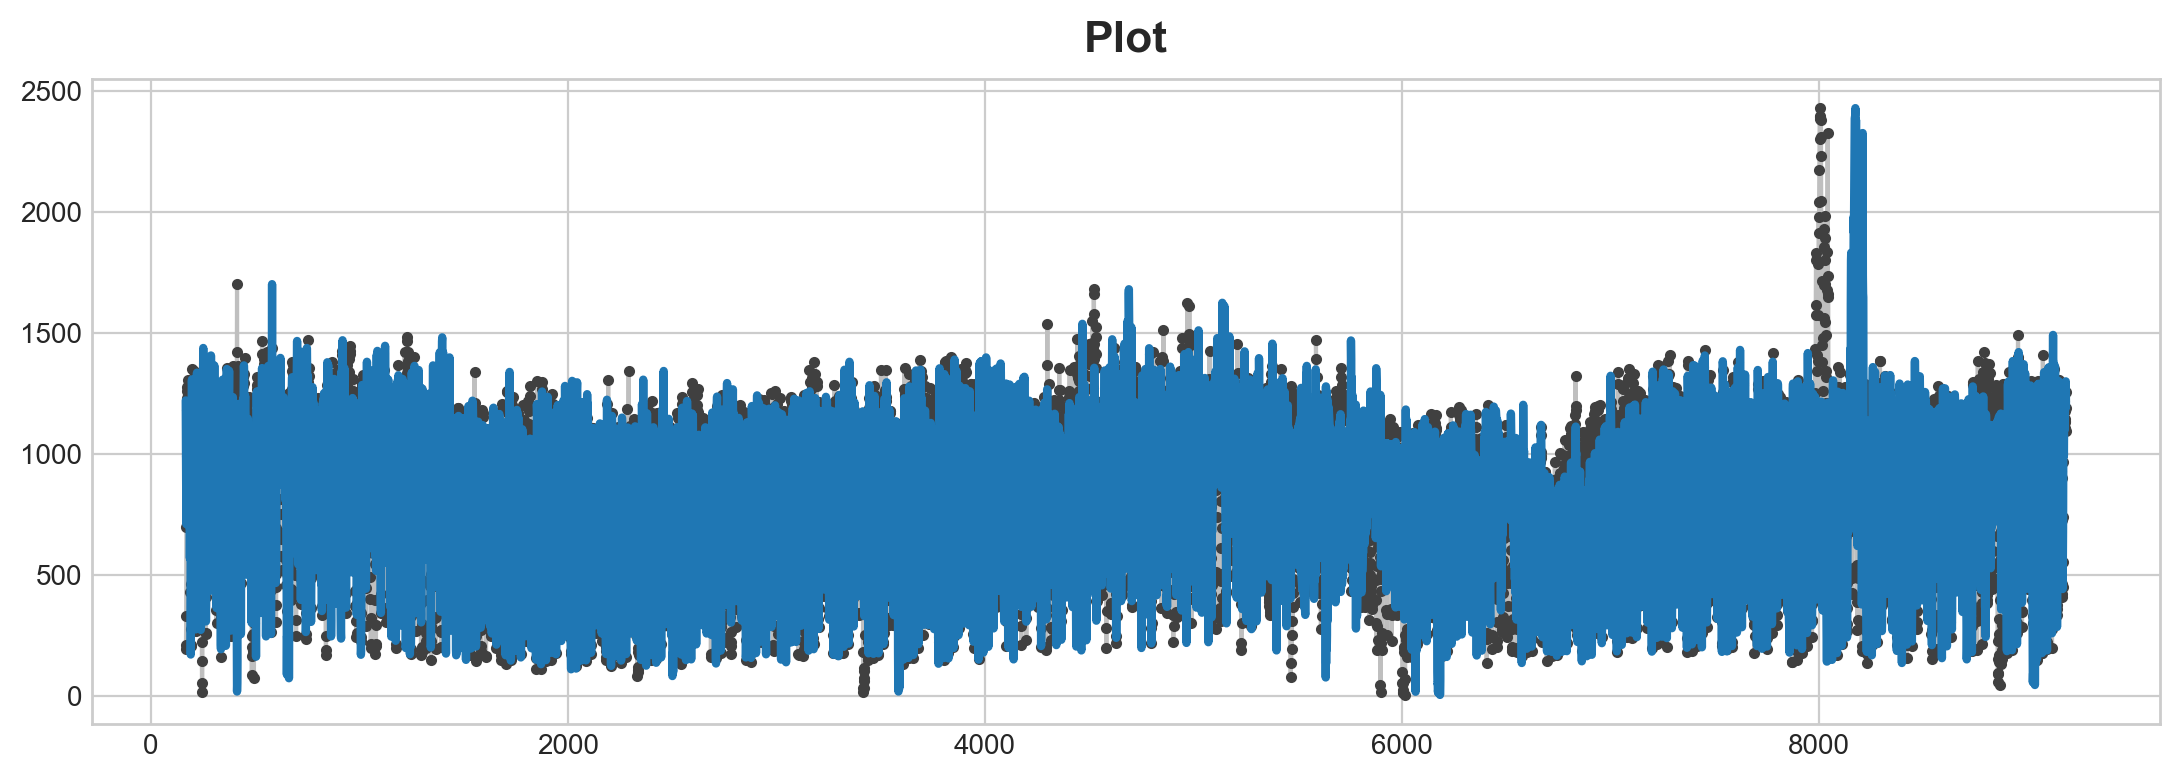

In [161]:
ce_df['Lag_7'] = ce_df['Débit horaire'].shift(168)
ce_df_7 = ce_df.reindex(columns=['Débit horaire', 'Lag_7'])

ce_df.iloc[168:336]
x = ce_df['Lag_7']
x = x.dropna()
y, X = ce_df.loc[:, 'Débit horaire'].align(x, join='inner')  # drop corresponding values in target
print(rmse(X, y))


plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)

ax = y.plot(**plot_params)
ax = X.plot(ax=ax, linewidth=3)
ax.set_title('Plot')

Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

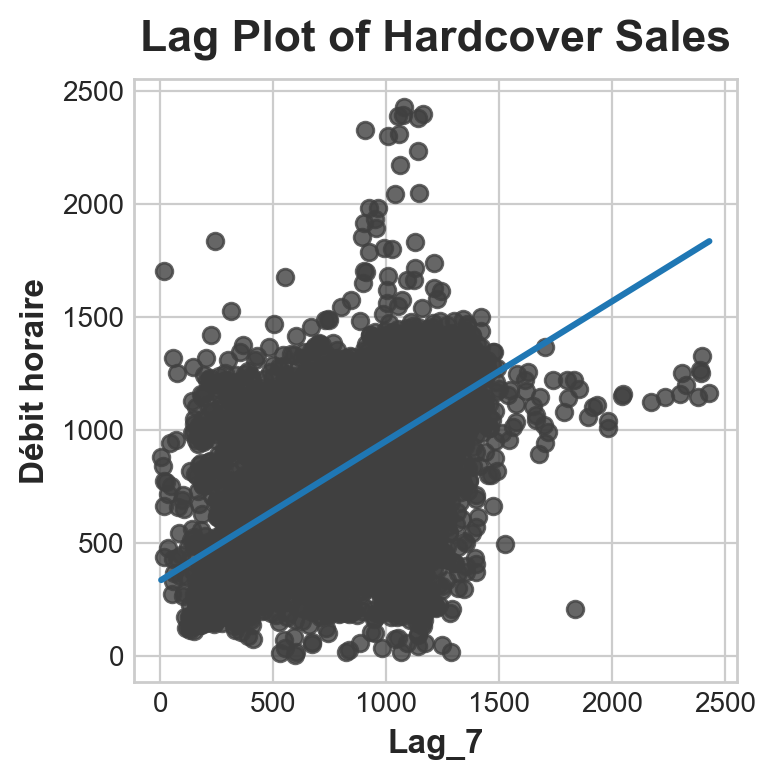

In [137]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_7', y='Débit horaire', data=ce_df_7, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

RMSE 324.2


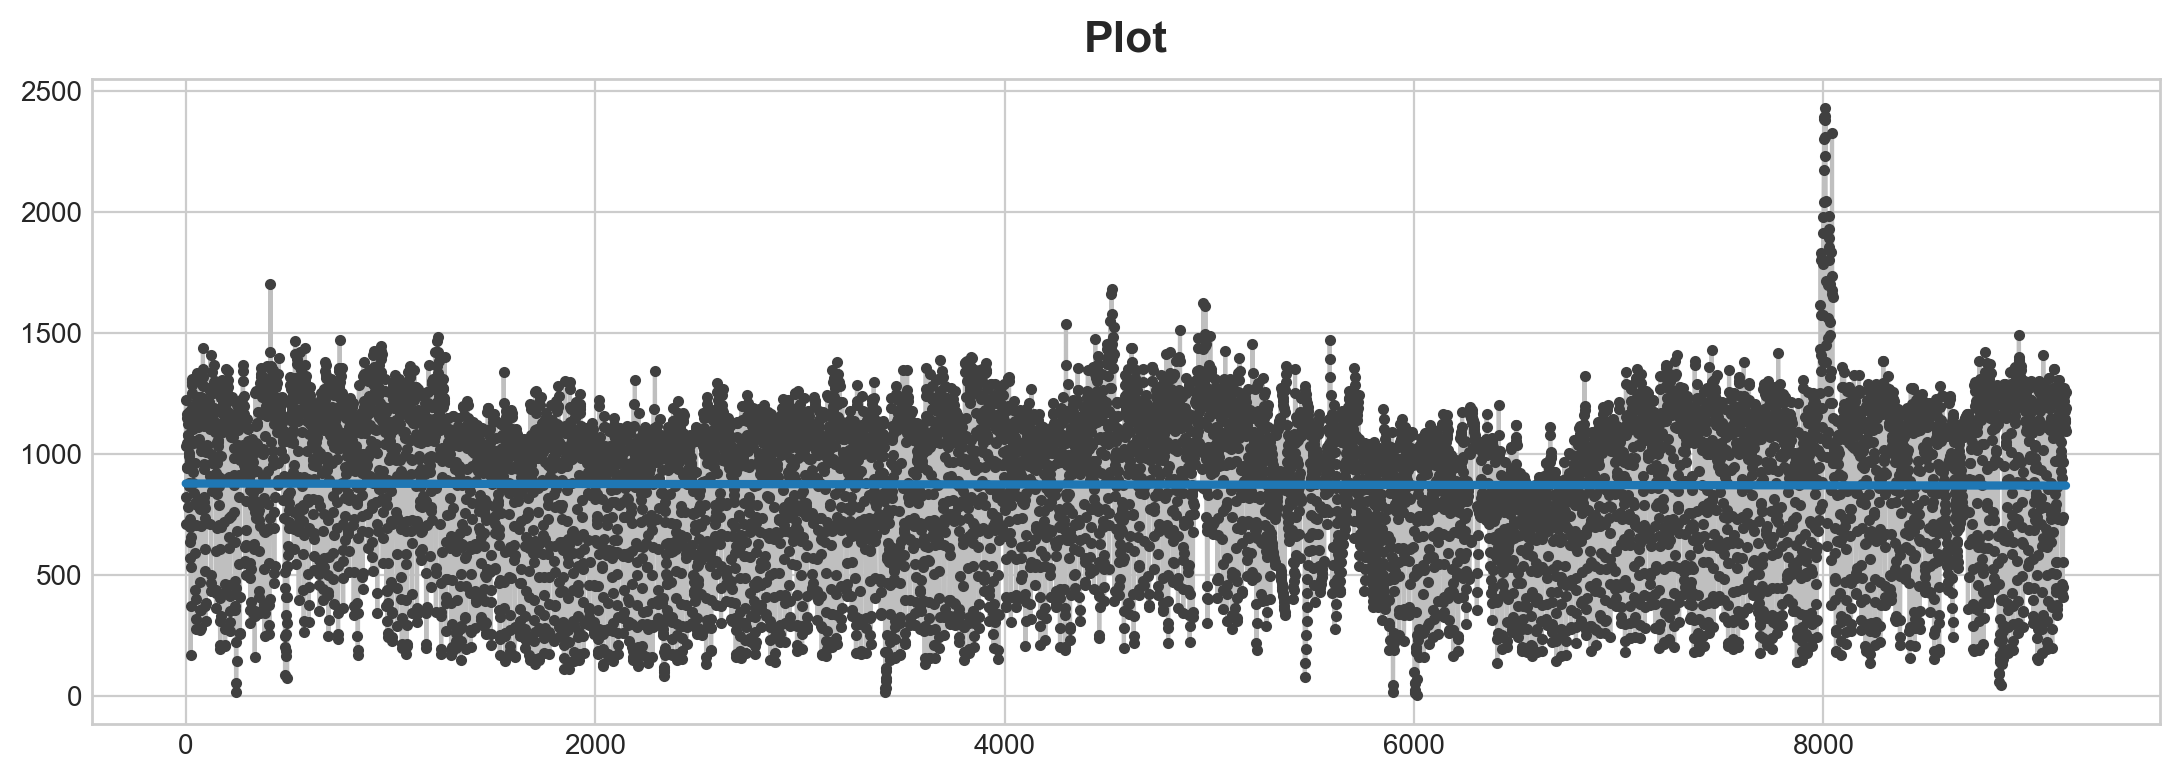

In [111]:
ce_df_7["Time"] = ce_df_7.index
linear_regr(ce_df_7, ['Time'], 'Débit horaire')

RMSE 255.4


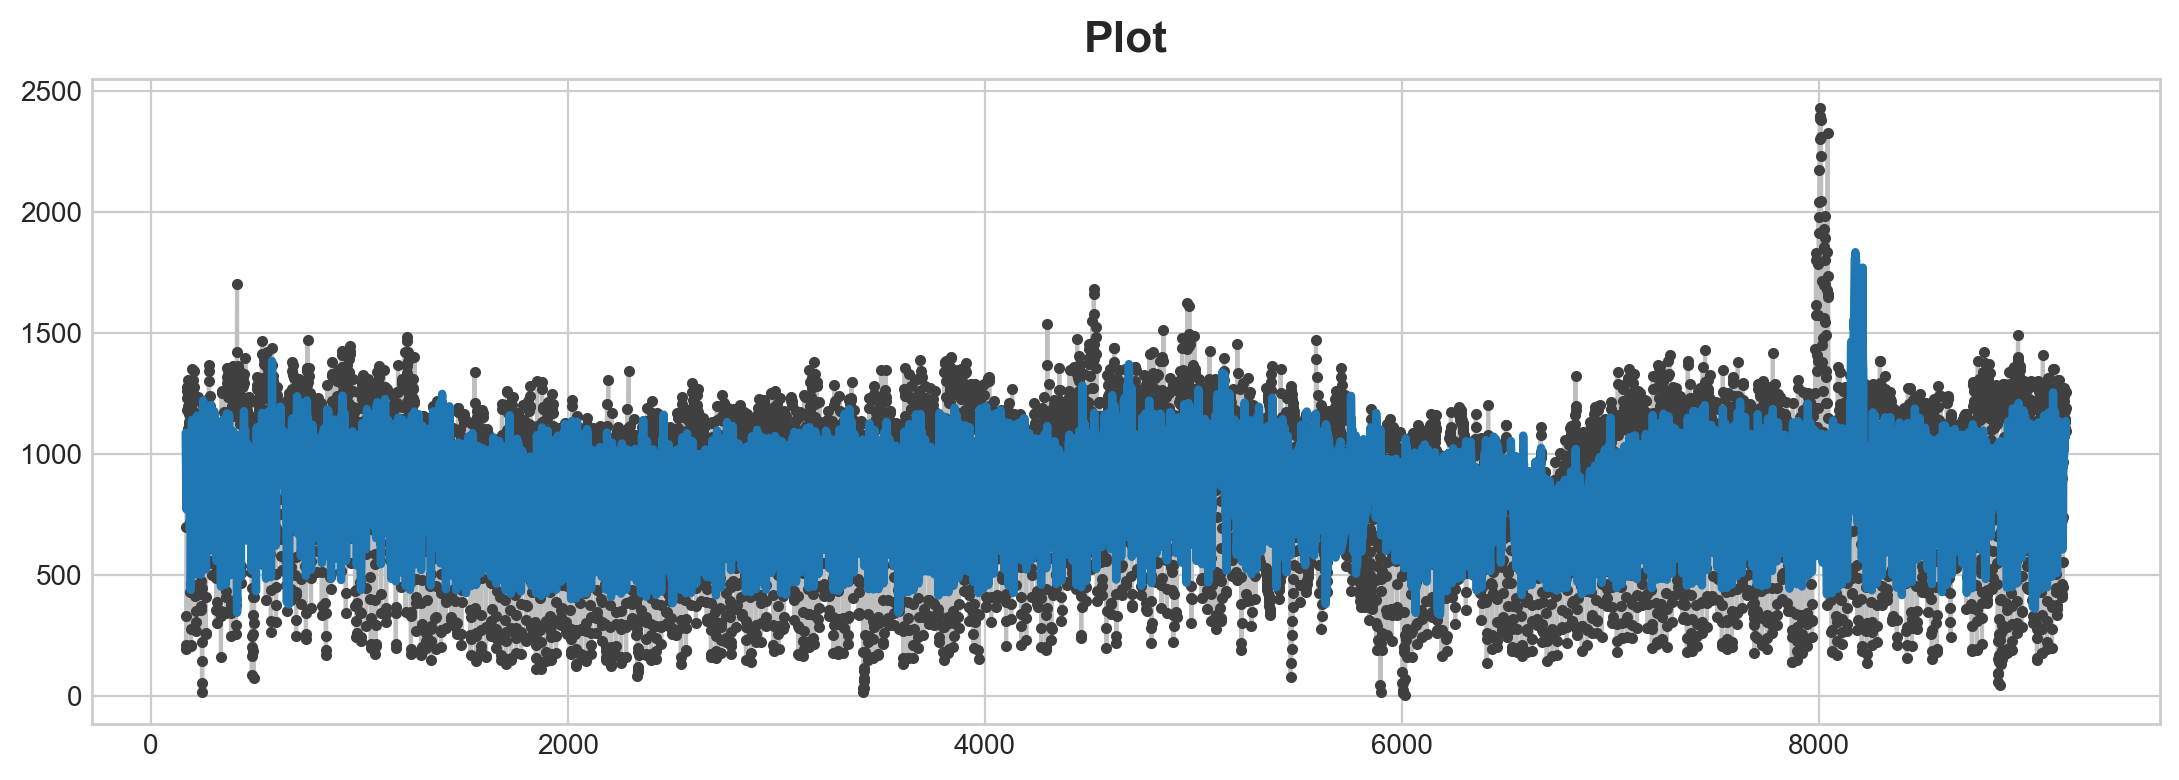

In [112]:
linear_regr(ce_df_7, ['Lag_7'], 'Débit horaire')

- Feature: Ce qu'il s'est passé il y a 168h (7 jours) => pas mal
- RMSE 255.4

### Adding features

- Libelle	Date et heure de comptage
- Débit horaire
- Taux d'occupation
- Etat trafic
- Etat arc_Barré
- Etat arc_Invalide
- Date
- Jour férié
- Jour de la semaine_0
- Jour de la semaine_1
...
- Jour de la semaine_6

RMSE 254.8


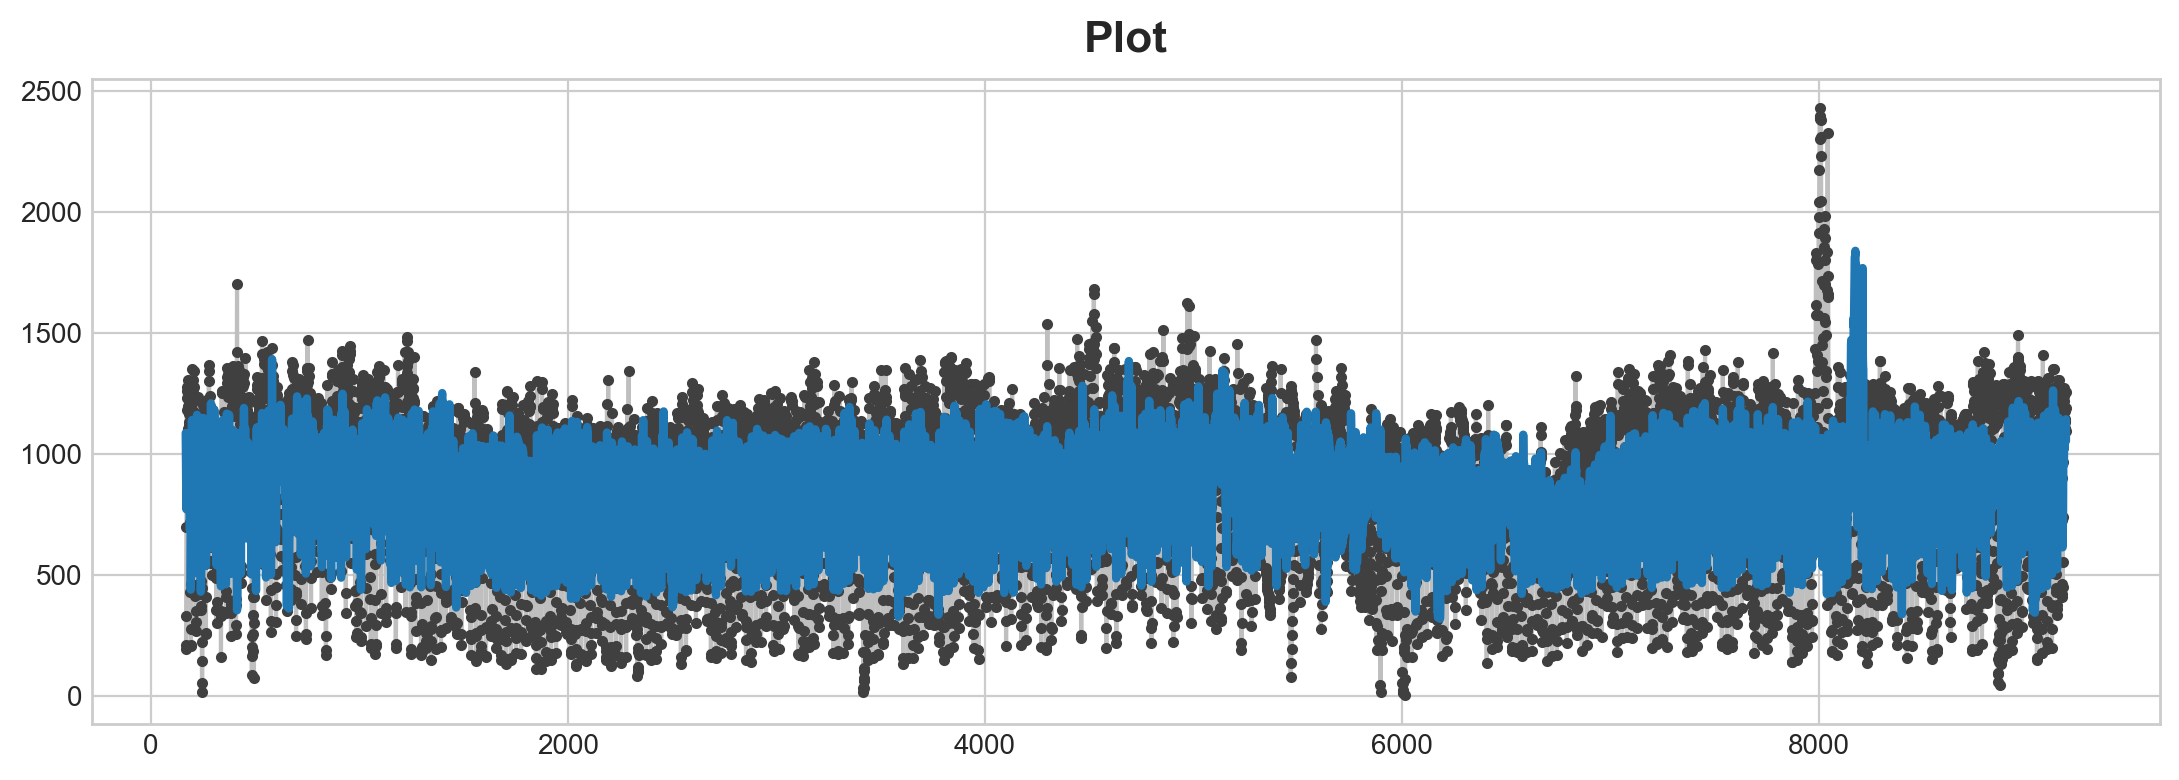

In [143]:
ce_df_augmented = ce_df.reindex(columns=['Débit horaire', 'Lag_7', 'Jour férié', 'Jour de la semaine_0', 'Jour de la semaine_1', 'Jour de la semaine_2', 'Jour de la semaine_3', 'Jour de la semaine_4', 'Jour de la semaine_5', 'Jour de la semaine_6'])

linear_regr(
    df=ce_df_augmented,
    x_feature_names=['Lag_7'],
    y_feature_name='Débit horaire'
)

- Lag 7 : 255,4
- Lag 7 + Vacances : 255
- Lag 7 + Vacances + Jours de la semaines : 254,8

## Taux d'occupation

Text(0.5, 1.0, 'Lag Plot of Hardcover Sales')

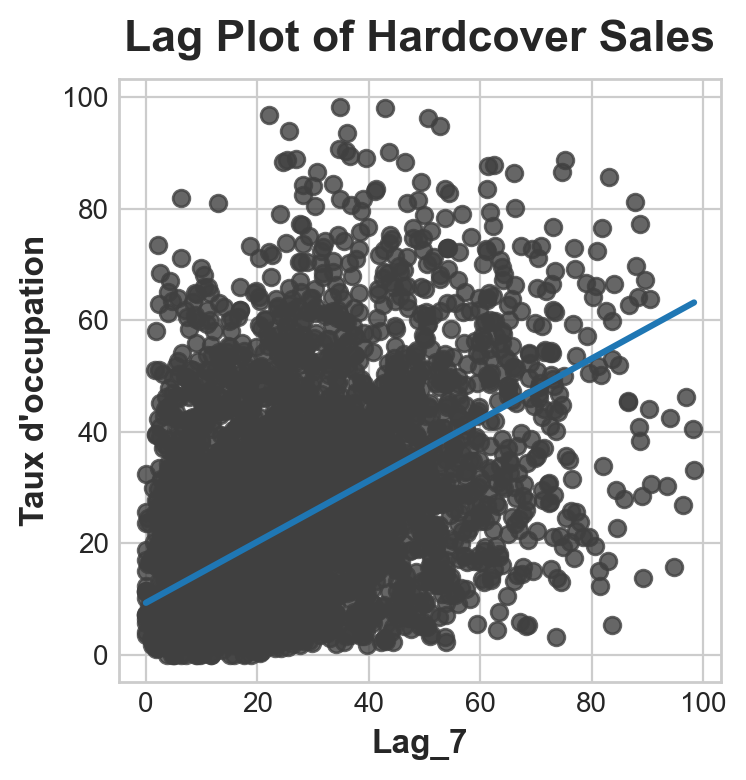

In [145]:
variable = "Taux d'occupation"

ce_df['Lag_7'] = ce_df[variable].shift(168)
ce_df_7 = ce_df.reindex(columns=[variable, 'Lag_7'])

fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_7', y=variable, data=ce_df_7, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales')

RMSE 14.9


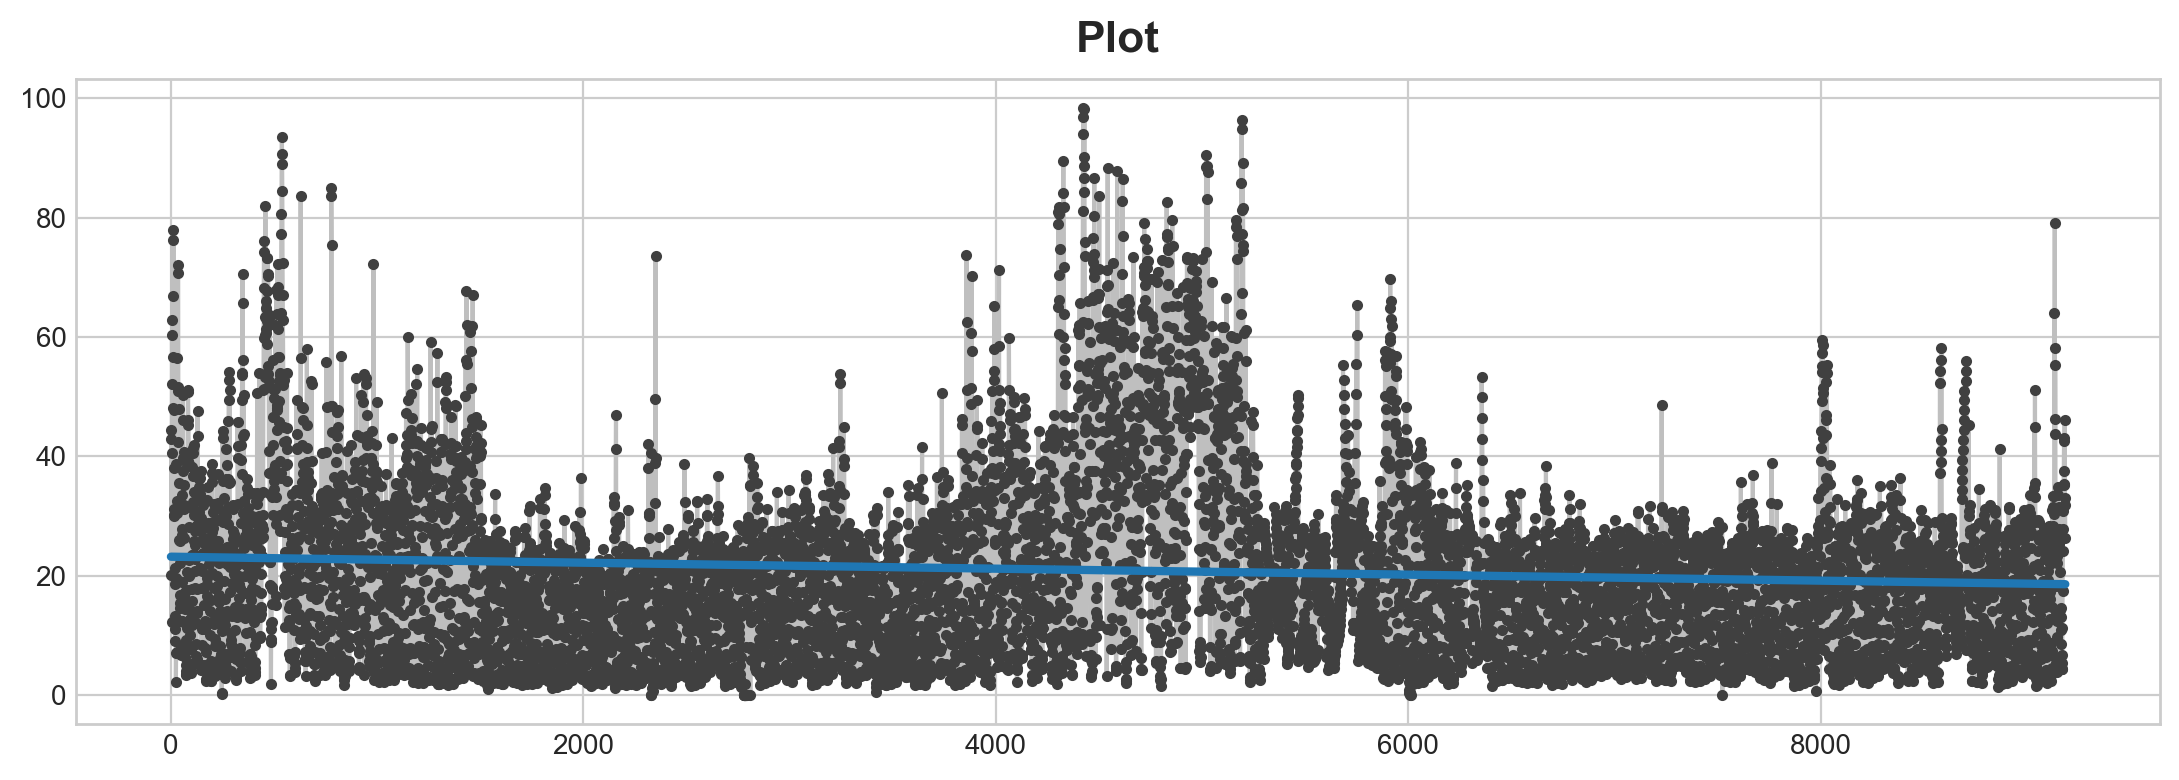

In [147]:
ce_df_7["Time"] = ce_df_7.index
linear_regr(ce_df_7, ['Time'], variable)

RMSE 12.4


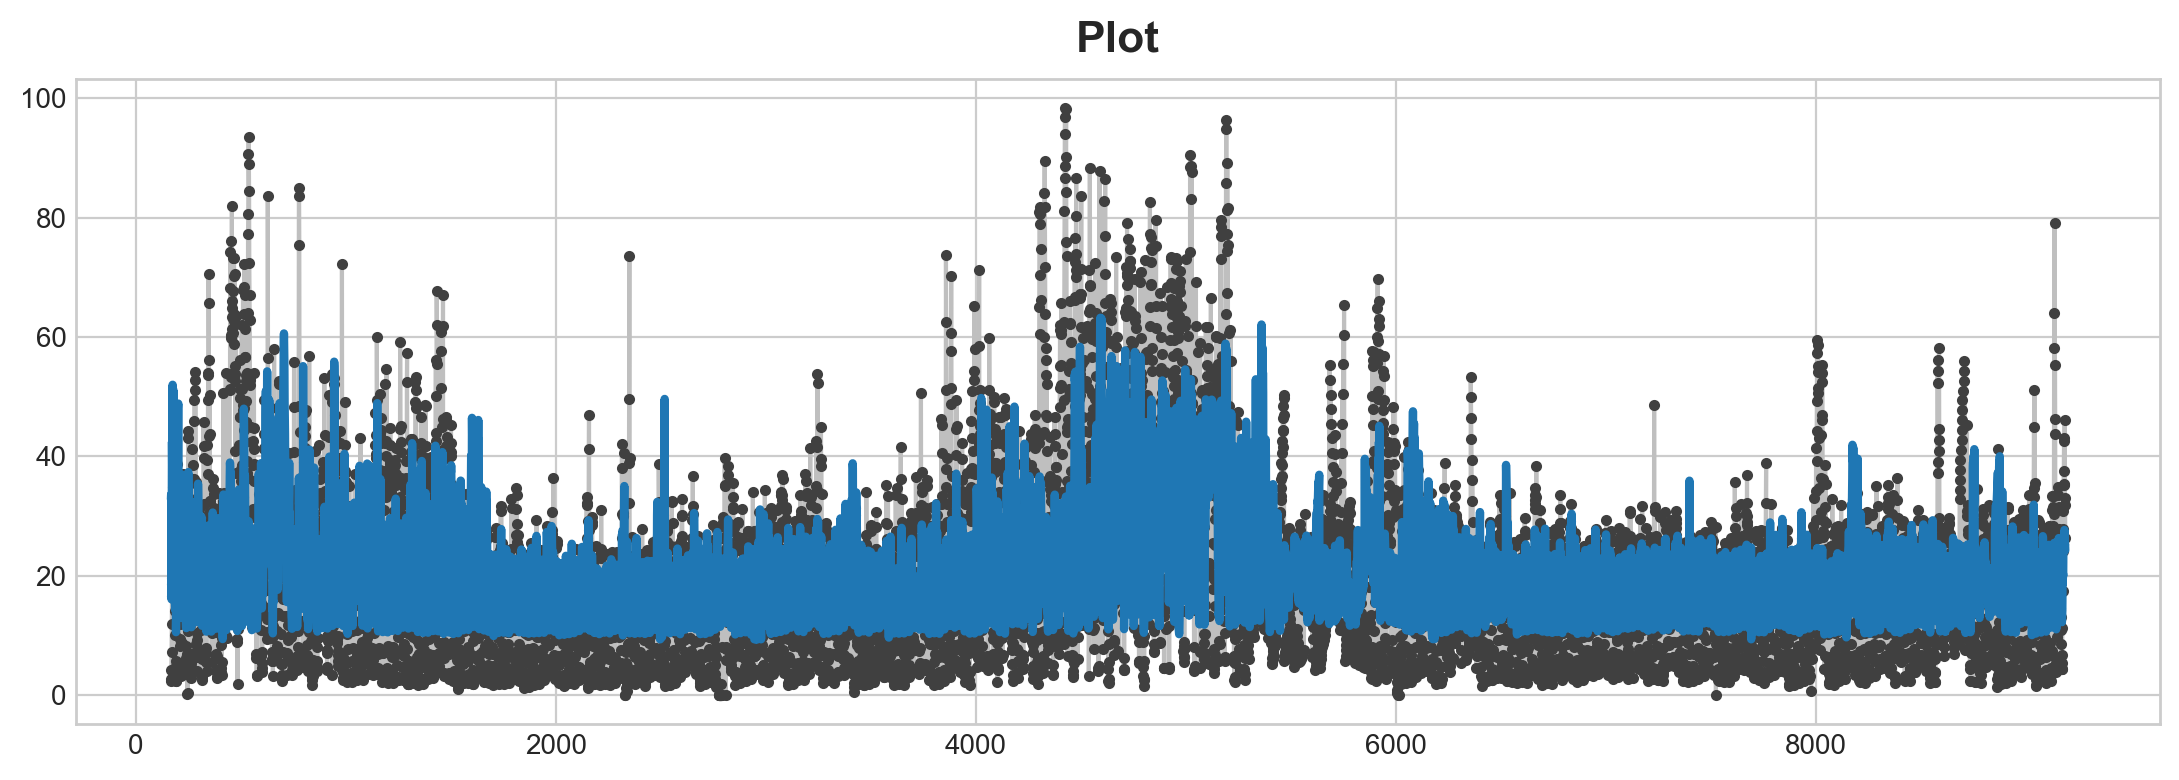

In [146]:
linear_regr(ce_df_7, ['Lag_7'], variable)

RMSE 14.9


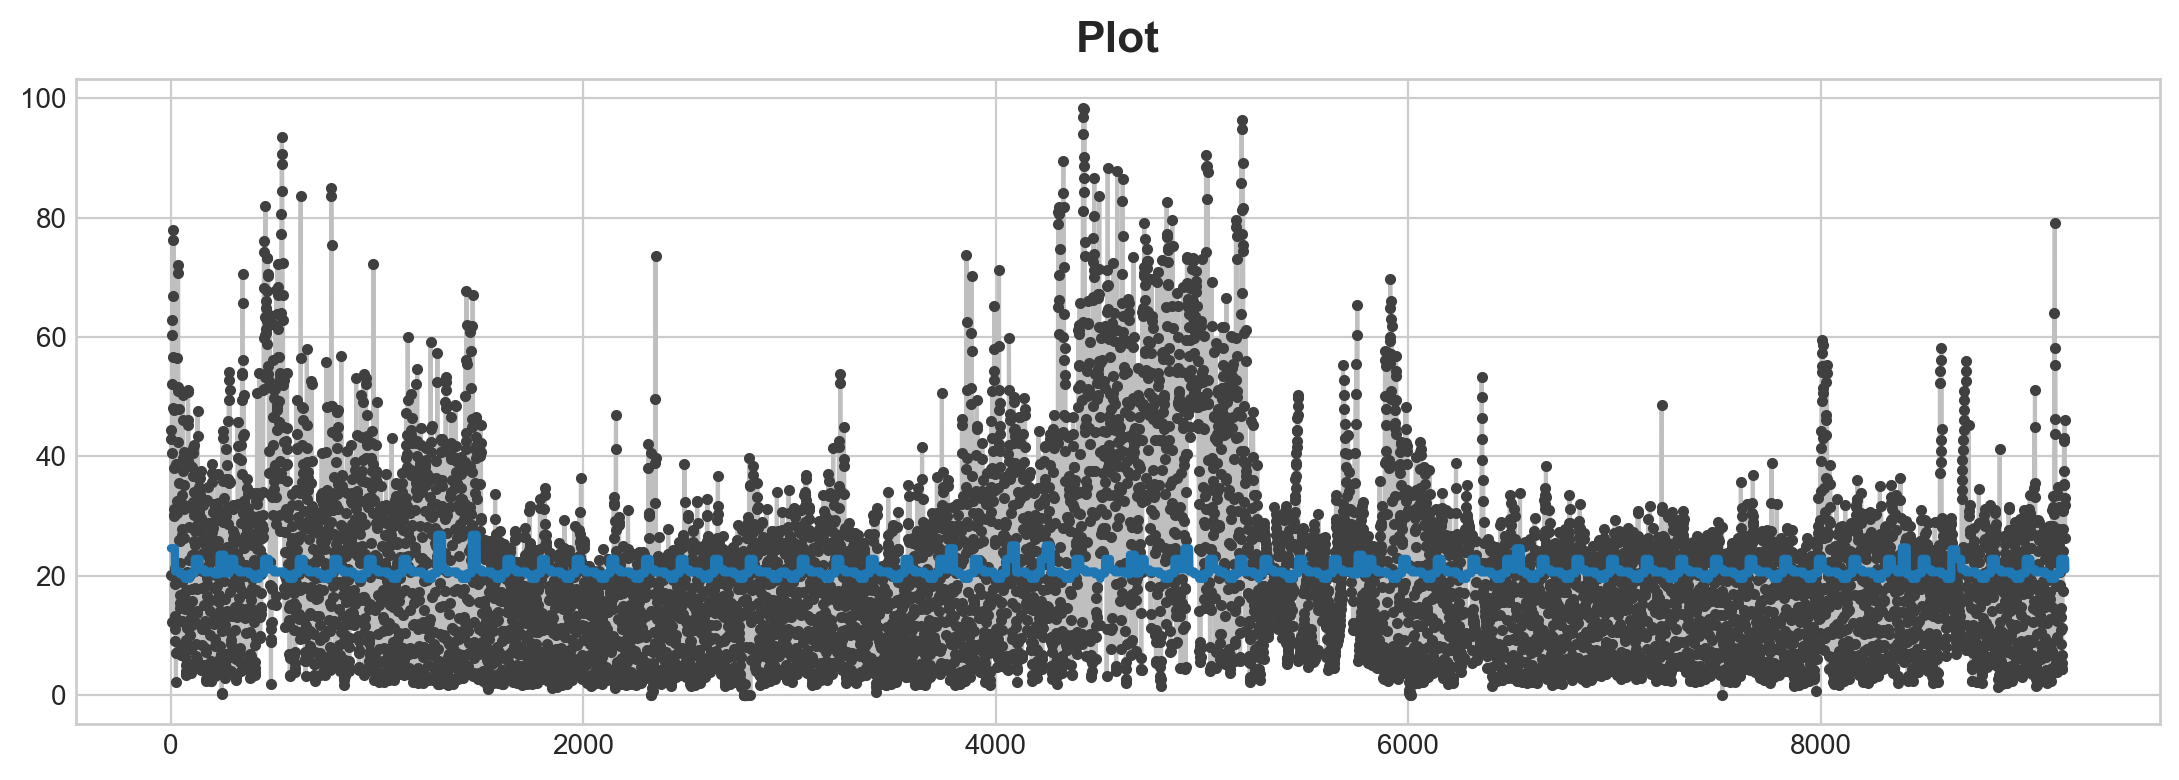

In [156]:
ce_df_augmented = ce_df.reindex(columns=[variable, 'Lag_7', 'Jour férié', 'Jour de la semaine_0', 'Jour de la semaine_1', 'Jour de la semaine_2', 'Jour de la semaine_3', 'Jour de la semaine_4', 'Jour de la semaine_5', 'Jour de la semaine_6'])

linear_regr(
    df=ce_df_augmented,
    x_feature_names=['Jour férié', 'Jour de la semaine_0', 'Jour de la semaine_1', 'Jour de la semaine_2', 'Jour de la semaine_3', 'Jour de la semaine_4', 'Jour de la semaine_5', 'Jour de la semaine_6'],
    y_feature_name=variable
)

### Seasonality

In [ ]:
from pathlib import Path
from warnings import simplefilter

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.deterministic import CalendarFourier, DeterministicProcess
from scipy.signal import periodogram


simplefilter("ignore")


# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 5))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'


# annotations: https://stackoverflow.com/a/49238256/5769929
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax


def plot_periodogram(ts, detrend='linear', ax=None):
    fs = pd.Timedelta("1Y") / pd.Timedelta("1D")
    freqencies, spectrum = periodogram(
        ts,
        fs=fs,
        detrend=detrend,
        window="boxcar",
        scaling='spectrum',
    )
    if ax is None:
        _, ax = plt.subplots()
    ax.step(freqencies, spectrum, color="purple")
    ax.set_xscale("log")
    ax.set_xticks([1, 2, 4, 6, 12, 26, 52, 104])
    ax.set_xticklabels(
        [
            "Annual (1)",
            "Semiannual (2)",
            "Quarterly (4)",
            "Bimonthly (6)",
            "Monthly (12)",
            "Biweekly (26)",
            "Weekly (52)",
            "Semiweekly (104)",
        ],
        rotation=30,
    )
    ax.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
    ax.set_ylabel("Variance")
    ax.set_title("Periodogram")
    return ax


data_dir = Path("../input/ts-course-data")
tunnel = pd.read_csv(data_dir / "tunnel.csv", parse_dates=["Day"])
tunnel = tunnel.set_index("Day").to_period("D")

In [ ]:
X = tunnel.copy()

# days within a week
X["day"] = X.index.dayofweek  # the x-axis (freq)
X["week"] = X.index.week  # the seasonal period (period)

# days within a year
X["dayofyear"] = X.index.dayofyear
X["year"] = X.index.year
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(11, 6))
seasonal_plot(X, y="NumVehicles", period="week", freq="day", ax=ax0)
seasonal_plot(X, y="NumVehicles", period="year", freq="dayofyear", ax=ax1)